<a href="https://colab.research.google.com/github/Andrea68A/Puc_Ciencia_Dados/blob/mvp_trabalho/MVP_Dataset_Suporte_Tecnico_Andrea_V0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MVP - Dataset sobre Chamados de Suporte Técnico - Andréa de Mattos Araújo Alves


## Sobre o dataset de chamados abertos para o  Suporte Técnico

O dataset **Technical Support Dataset** (https://www.kaggle.com/datasets/suvroo/technical-support-dataset/data?select=Technical+Support+Dataset.csv) possibilita a análise e criação de Indicadores-Chave de Desempenho (KPI - *Key Performance Indicators*) para a resolução de Chamados de Suporte Técnico.
Este dataset permite a classificação de um chamado segundo:

  *   A sua origem (por e-mail, chat ou telefone),
  *   O tópico / assunto abordado (ex: bug, configuração de produtos, etc.),
  *   A prioridade no atendimento (alta, média, baixa),
  *   Seu nível de suporte (N1 ou N2),
  *   Os tempos acordados e reais para primeiro atendimento e para resolução.

Obs.: O dataset analisado se refere aos chamados de suporte técnico no ano de 2023.


In [ ]:
chamados_tec.describe()

,Ticket ID,Agent interactions,Survey results,Latitude,Longitude
count,2330.000000,2312.000000,1173.000000,2330.000000,2330.000000
mean,2481.857082,5.470156,3.510656,48.260756,9.849723
std,858.040637,8.130958,1.240361,5.085409,9.814618
min,1012.000000,1.000000,1.000000,39.368279,-8.019675
25%,1726.250000,2.000000,3.000000,43.036776,2.349014
50%,2480.000000,4.000000,4.000000,48.864716,12.678565
75%,3233.750000,6.000000,4.000000,52.536273,15.474913
max,3999.000000,60.000000,5.000000,55.378052,25.483304


In [ ]:
# importação do Pandas
import pandas as pd

Importando o dataset **Technical Support Dataset** a partir de uma URL. O dataset está no Github, em modo **raw**.



In [ ]:
# Declaracao das variaveis publicas


# importando dados de uma url para um dataframe

# url a importar
global url_dados, chamados_tec
url_dados = 'https://raw.githubusercontent.com/Andrea68A/Puc_Ciencia_Dados/refs/heads/mvp_trabalho/Technical%20Support%20Dataset.csv'


# carga do dataset através da url, com separador de colunas = "," e pulando linhas com erros
chamados_tec = pd.read_csv(url_dados, sep =",", on_bad_lines='skip') # pulando linhas com erros


Inicialmente, iremos utilizar alguns comandos da biblioteca Pandas para exibir algumas estatísticas descritivas e fazer uma rápida análise exploratória do dataset. Os comentários nos blocos de código auxiliam no seu entendimento.

In [ ]:
# verificando que chamados_tech é um dataframe
print(type(chamados_tec))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
# verificando os tipos de cada coluna do dataframe
print(chamados_tec.dtypes)

Status                             object
Ticket ID                           int64
Priority                           object
Source                             object
Topic                              object
Agent Group                        object
Agent Name                         object
Created time                       object
Expected SLA to resolve            object
Expected SLA to first response     object
First response time                object
SLA For first response             object
Resolution time                    object
SLA For Resolution                 object
Close time                         object
Agent interactions                float64
Survey results                    float64
Product group                      object
Support Level                      object
Country                            object
Latitude                          float64
Longitude                         float64
dtype: object


In [ ]:
# exibindo as primeiras linhas
chamados_tec.head()
# Eliminando a coluna 'Agent Name', por ser irrelevante à análise
chamados_tec.drop(['Agent Name'],axis=1,inplace=True)
chamados_tec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Status                          2330 non-null   object 
 1   Ticket ID                       2330 non-null   int64  
 2   Priority                        2330 non-null   object 
 3   Source                          2330 non-null   object 
 4   Topic                           2330 non-null   object 
 5   Agent Group                     2330 non-null   object 
 6   Created time                    2330 non-null   object 
 7   Expected SLA to resolve         2330 non-null   object 
 8   Expected SLA to first response  2330 non-null   object 
 9   First response time             2312 non-null   object 
 10  SLA For first response          2330 non-null   object 
 11  Resolution time                 1912 non-null   object 
 12  SLA For Resolution              23

In [ ]:
# exibindo as últimas linhas
chamados_tec.tail()

,Status,Ticket ID,Priority,Source,Topic,Agent Group,Agent Name,Created time,Expected SLA to resolve,Expected SLA to first response,...,Resolution time,SLA For Resolution,Close time,Agent interactions,Survey results,Product group,Support Level,Country,Latitude,Longitude
2325,Resolved,3988,Low,Email,Product setup,1st line support,Connor Danielovitch,2023-12-29 03:33:04,2023-12-31 03:33:04,2023-12-29 04:33:04,...,2023-12-30 18:38:54.682,Within SLA,NaN,1.0,NaN,Ready to use Software,Tier 1,Spain,39.673370,-4.767726
2326,Resolved,3996,Medium,Email,Pricing and licensing,1st line support,Connor Danielovitch,2023-12-30 03:11:44,2024-01-01 03:11:44,2023-12-30 04:11:44,...,2023-12-30 20:49:05.132,Within SLA,NaN,1.0,NaN,Custom software development,Tier 1,Slovenia,46.149166,14.986011
2327,Resolved,3997,High,Email,Feature request,2nd line support,Michele Whyatt,2023-12-30 04:51:54,2024-01-01 04:51:54,2023-12-30 05:51:54,...,2024-01-04 05:39:41.133,SLA Violated,NaN,1.0,NaN,Other,Tier 2,Republic of Ireland,53.094024,-8.019675
2328,Resolved,3998,Low,Email,Product setup,1st line support,Kristos Westoll,2023-12-30 13:16:56,2024-01-01 13:16:56,2023-12-30 14:16:56,...,2023-12-31 23:25:16.816,Within SLA,NaN,10.0,NaN,Custom software development,Tier 1,Republic of Ireland,53.094024,-8.019675
2329,Resolved,3999,High,Email,Feature request,1st line support,Sheela Cutten,2023-12-30 19:49:51,2024-01-01 19:49:51,2023-12-30 20:49:51,...,2024-01-01 10:17:15.196,Within SLA,NaN,2.0,NaN,Custom software development,Tier 1,Germany,51.165691,10.451526


In [ ]:
# exibindo as dimensões do dataset
chamados_tec.shape

(2330, 22)

In [ ]:
#exibindo a coluna status
chamados_tec['Status'].unique()

array(['Closed', 'In progress', 'Resolved', 'Open'], dtype=object)

In [ ]:
chamados_tec['Topic'].replace(to_replace='Princing and Licensing',value='Pricing and licensing',inplace=True)
chamados_tec['Topic'].unique()

array(['Feature request', 'Product setup', 'Purchasing and invoicing',
       'Pricing and licensing', 'Other', 'Bug report', 'Training request'],
      dtype=object)

In [ ]:
chamados_tec['Source'].unique()


array(['Email', 'Phone', 'Chat'], dtype=object)

In [ ]:
# Eliminando a coluna Agent Name por ser irrelevante a esta análise de dados

In [ ]:
import pandas as pd
# url a importar
#url_dados = 'https://raw.githubusercontent.com/Andrea68A/Puc_Ciencia_Dados/refs/heads/mvp_trabalho/Technical%20Support%20Dataset.csv'
#chamados_tec = pd.read_csv(url_dados, sep =",", on_bad_lines='skip') # pulando linhas com erros
chamados_tec['Topic'].replace(to_replace='Pricing and Licensing',value='Pricing and licensing', inplace=True)
chamados_tec['Topic'].unique()
chamados_tec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Status                          2330 non-null   object 
 1   Ticket ID                       2330 non-null   int64  
 2   Priority                        2330 non-null   object 
 3   Source                          2330 non-null   object 
 4   Topic                           2330 non-null   object 
 5   Agent Group                     2330 non-null   object 
 6   Agent Name                      2330 non-null   object 
 7   Created time                    2330 non-null   object 
 8   Expected SLA to resolve         2330 non-null   object 
 9   Expected SLA to first response  2330 non-null   object 
 10  First response time             2312 non-null   object 
 11  SLA For first response          2330 non-null   object 
 12  Resolution time                 19

In [ ]:
chamados_tec['Survey results'].unique()


array([ 3., nan,  4.,  2.,  5.,  1.])

In [ ]:
chamados_tec['Agent Group'].unique()

array(['1st line support', '2nd line support'], dtype=object)

In [ ]:
chamados_tec['Product group'].unique()

array(['Custom software development', 'Other', 'Ready to use Software',
       'Training and Consulting Services'], dtype=object)

In [ ]:
chamados_tec['Agent Name'].unique()

array(['Kristos Westoll', 'Adolpho Messingham', 'Bernard Beckley',
       'Connor Danielovitch', 'Sheela Cutten', 'Michele Whyatt',
       'Nicola Wane', 'Heather Urry'], dtype=object)

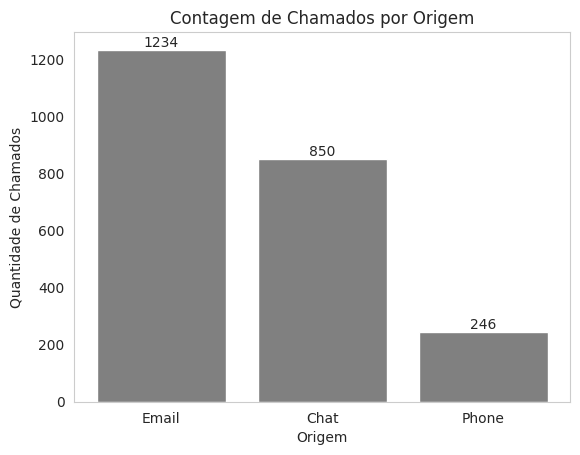

In [ ]:
# importação do pyplot
import matplotlib.pyplot as plt
container_barra = plt.bar(chamados_tec['Source'].value_counts().index, chamados_tec['Source'].value_counts().values,color='grey')
plt.grid(False)
plt.xlabel('Origem')
plt.bar_label(container_barra)
plt.ylabel('Quantidade de Chamados')
plt.title('Contagem de Chamados por Origem')
plt.show()

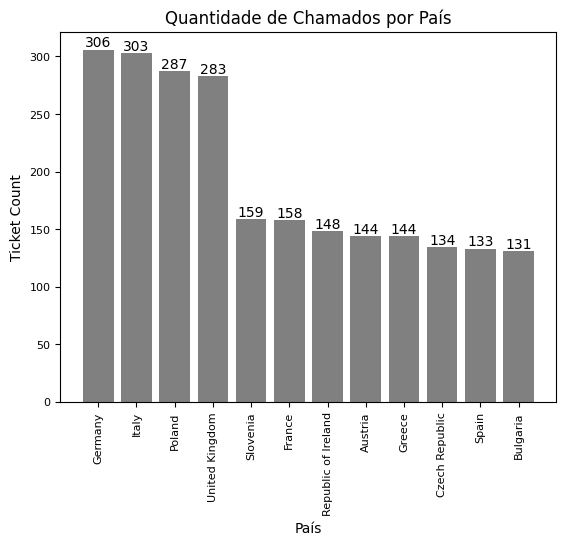

In [ ]:
# importação do pyplot
import matplotlib.pyplot as plt
bar_container = plt.bar(chamados_tec['Country'].value_counts().index, chamados_tec['Country'].value_counts().values,color='grey')
plt.xlabel('País')
plt.xticks(fontsize=8, rotation=90)
plt.bar_label(bar_container)
plt.ylabel('Ticket Count')
plt.yticks(fontsize=8)
plt.title('Quantidade de Chamados por País')
plt.show()

Análise multivariada - chamados por origem (e-mail, telefone ou chat) e país

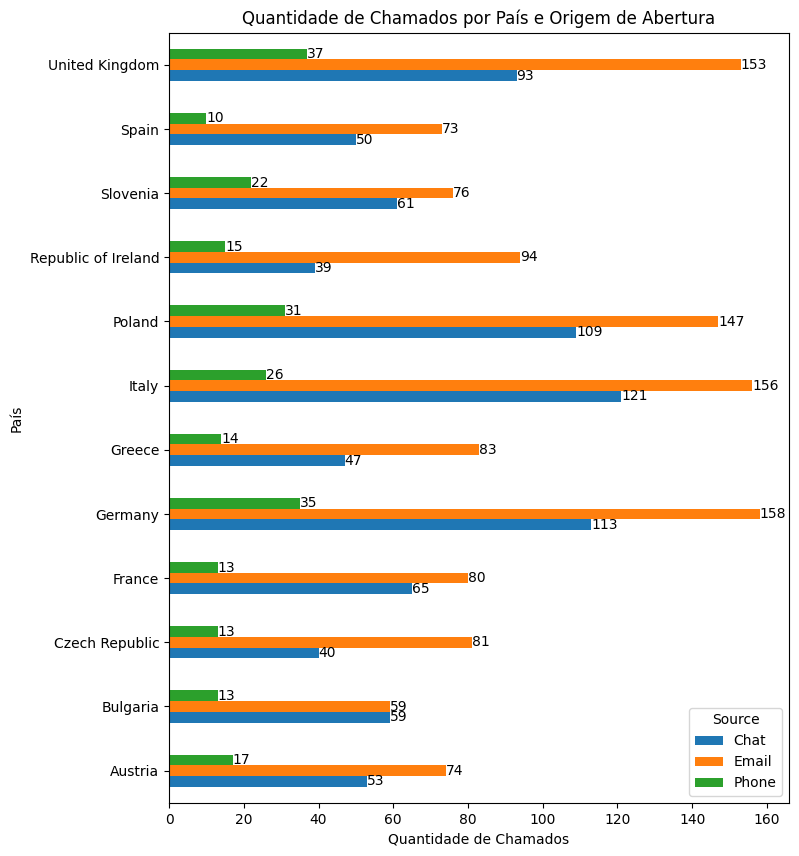

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Declaracao das variaveis publicas


# importando dados de uma url para um dataframe

# url a importar
global url_dados, chamados_tec
url_dados = 'https://raw.githubusercontent.com/Andrea68A/Puc_Ciencia_Dados/refs/heads/mvp_trabalho/Technical%20Support%20Dataset.csv'


# carga do dataset através da url, com separador de colunas = "," e pulando linhas com erros
chamados_tec = pd.read_csv(url_dados, sep =",", on_bad_lines='skip') # pulando linhas com erros
dados = chamados_tec.groupby(by=['Country','Source']).size().unstack()
ax = dados.plot.barh(figsize=(8, 10))

for container in ax.containers: # imprime as quantidades de chamado por origem, próximo às barras
    ax.bar_label(container)

ax.set_xlabel('Quantidade de Chamados')
ax.set_ylabel('País')
ax.set_title('Quantidade de Chamados por País e Origem de Abertura')
plt.show()


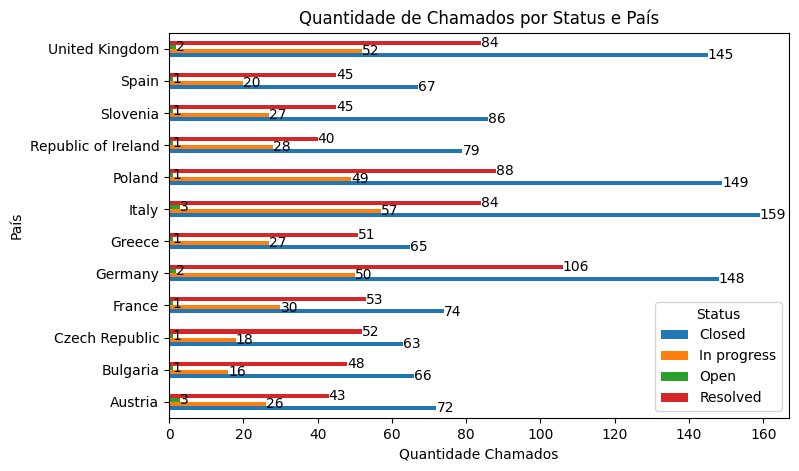

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Declaracao das variaveis publicas


# importando dados de uma url para um dataframe

# url a importar
global url_dados, chamados_tec
url_dados = 'https://raw.githubusercontent.com/Andrea68A/Puc_Ciencia_Dados/refs/heads/mvp_trabalho/Technical%20Support%20Dataset.csv'


# carga do dataset através da url, com separador de colunas = "," e pulando linhas com erros
chamados_tec = pd.read_csv(url_dados, sep =",", on_bad_lines='skip') # pulando linhas com erros

dados = chamados_tec.groupby(by=['Country','Status']).size().unstack()
ax = dados.plot.barh(figsize=(8,5))


for container in ax.containers: # imprime as quantidades de chamado por origem, próximo às barras
    ax.bar_label(container)

ax.set_xlabel('Quantidade Chamados')
ax.set_ylabel('País')
ax.set_title('Quantidade de Chamados por Status e País')
plt.show()


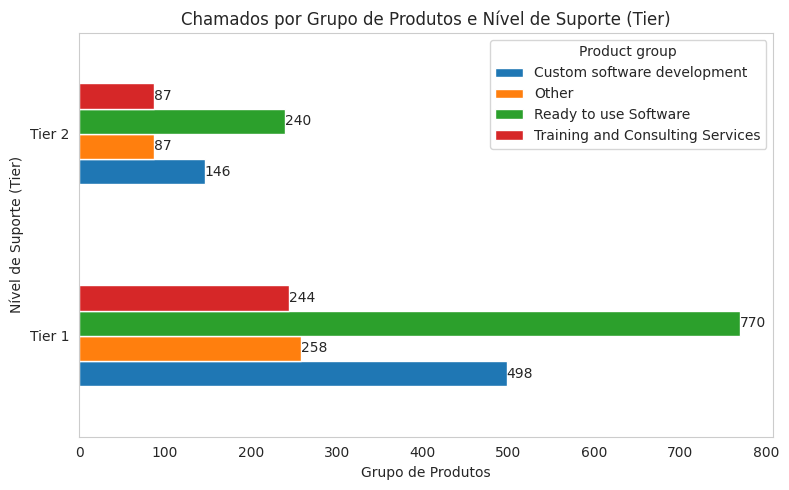

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
dados = chamados_tec.groupby(by=['Support Level','Product group']).size().unstack()
ax = dados.plot.barh(figsize=(8,5))

for container in ax.containers: # imprime as quantidades de chamado por origem, próximo às barras
    ax.bar_label(container)

ax.set_xlabel('Grupo de Produtos')
ax.set_ylabel('Nível de Suporte (Tier)')
ax.grid(False)
ax.set_title('Chamados por Grupo de Produtos e Nível de Suporte (Tier)')
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#!pip install pyecharts


#from pyecharts import options as opts
#from pyecharts.charts import Line, Bar, Scatter

# importando dados de uma url para um dataframe

# url a importar
#url_dados = 'https://raw.githubusercontent.com/Andrea68A/Puc_Ciencia_Dados/refs/heads/mvp_trabalho/Technical%20Support%20Dataset.csv'


# carga do dataset através da url, com separador de colunas = "," e pulando linhas com erros
#chamados_tec = pd.read_csv(url_dados, sep =",", on_bad_lines='skip') # pulando linhas com erros



In [ ]:
# Converter o atributo 'Created time' (data / hora de criação do chamado) para o formato datetime
#chamados_tec['Created time'] = pd.to_datetime(chamados_tec['Created time'])

In [ ]:
# Contadores por período
# cont_diario = contador de chamados abertos por dia
# cont_semanal = contador de chamados abertos por semana
# cont_mensal = condador de chamados abertos por mês
global cont_diario, cont_semanal, cont_mensal
cont_diario = chamados_tec.groupby(chamados_tec['Created time'].dt.date).size()

cont_semanal = chamados_tec.groupby(chamados_tec['Created time'].dt.to_period('W')).size()

cont_mensal = chamados_tec.groupby(chamados_tec['Created time'].dt.to_period('M')).size()


Text(0, 0.5, 'Quantidade de Chamados')

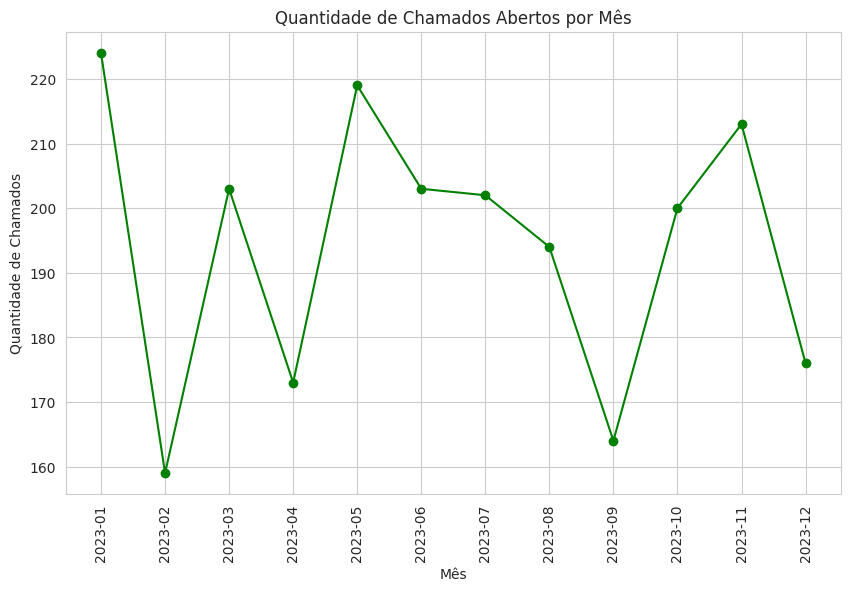

In [ ]:
# Gráfico de linhas - quantidade de chamados abertos por mês
import matplotlib.pyplot as plt
import seaborn as sns
dados = cont_mensal.values
meses = cont_mensal.index.astype(str)
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
plt.plot(meses, dados, marker='o', linestyle='-', color='g')
plt.xticks(rotation=90)
plt.title('Quantidade de Chamados Abertos por Mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Chamados')


Text(0, 0.5, 'Quantidade de Chamados')

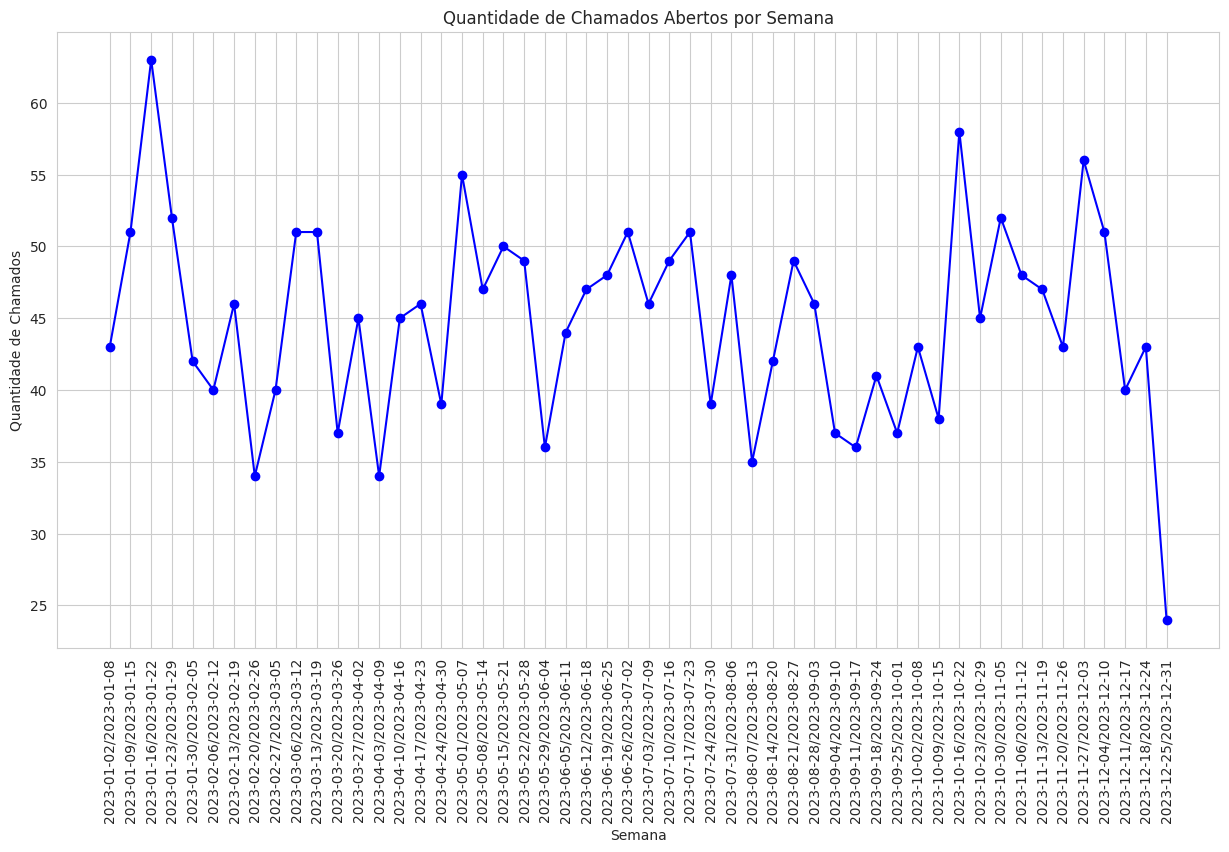

In [ ]:
# Gráfico de linhas - quantidade de chamados abertos por semana
import matplotlib.pyplot as plt
import seaborn as sns

dados = cont_semanal.values
semanas = cont_semanal.index.astype(str)
sns.set_style("whitegrid")
plt.figure(figsize=(15, 8))
plt.plot(semanas, dados, marker='o', linestyle='-', color='b')
plt.xticks(rotation=90)
plt.title('Quantidade de Chamados Abertos por Semana')
plt.xlabel('Semana')
plt.ylabel('Quantidade de Chamados')

Text(0, 0.5, 'Quantidade de Chamados')

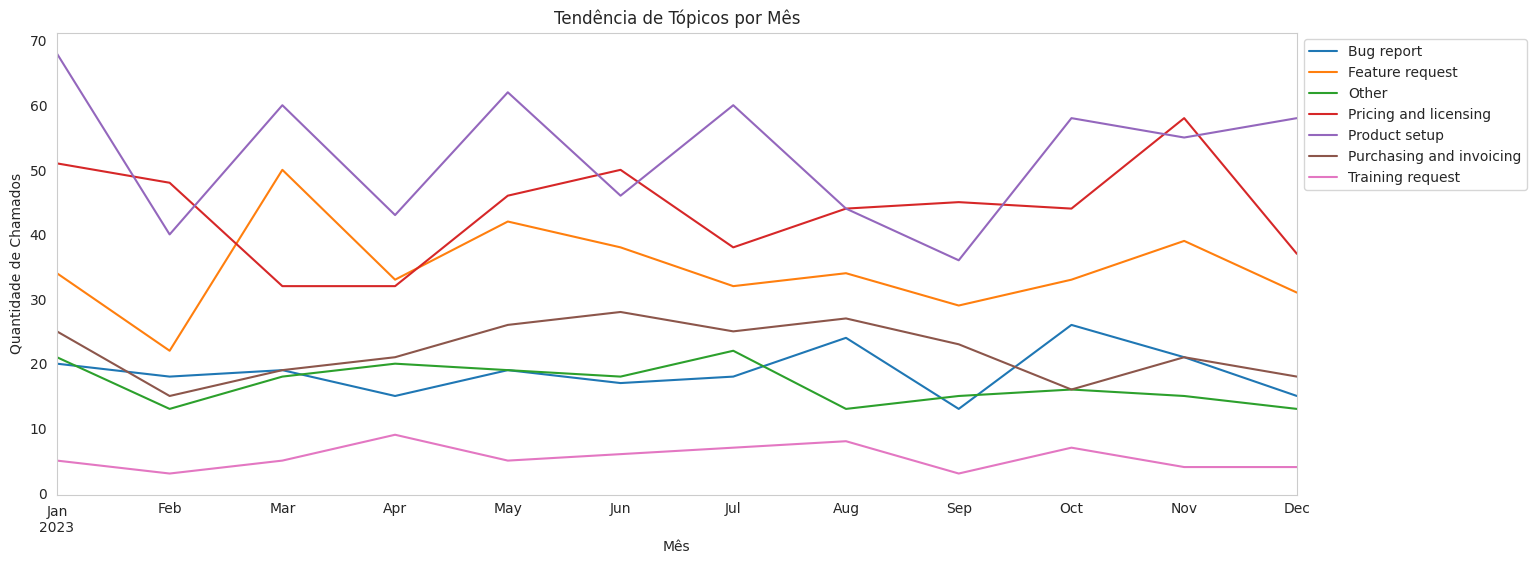

In [ ]:
# Gráfico de múltiplas linhas - tendência de tópicos por mês
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

topic_trends = chamados_tec.groupby([chamados_tec['Created time'].dt.to_period('M'), 'Topic']).size().unstack(fill_value=0)
topic_trends.plot(kind='line', figsize=(16, 6))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))



plt.grid(False)
plt.title('Tendência de Tópicos por Mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Chamados')


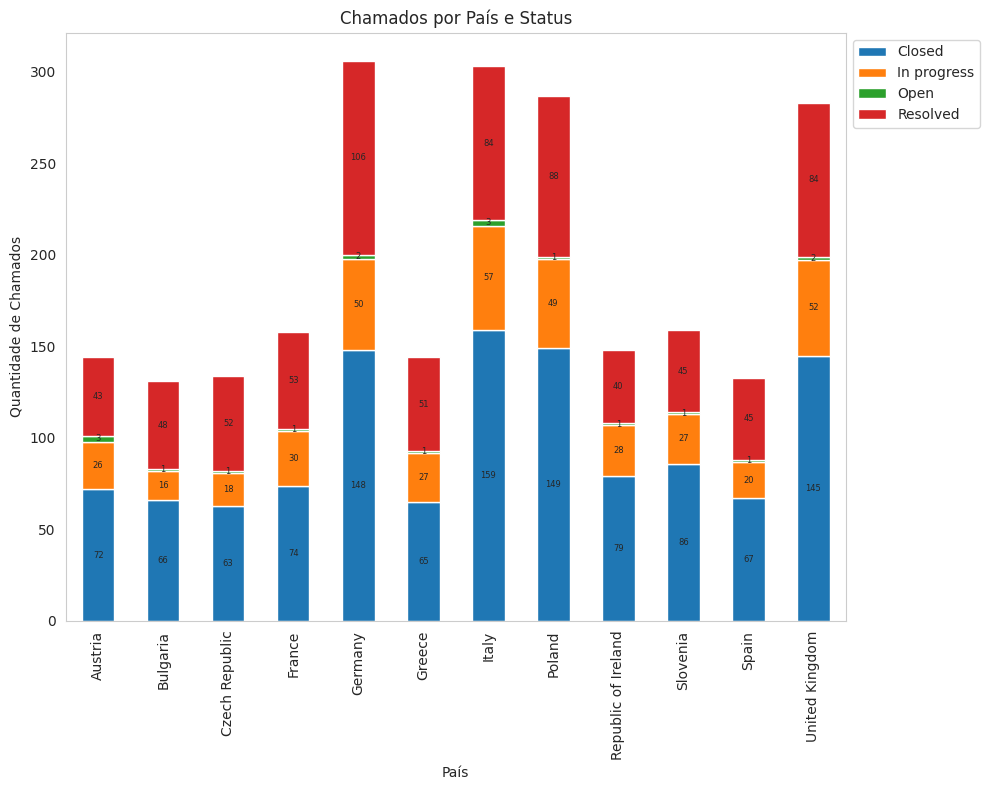

In [ ]:
from collections import OrderedDict
# Chamados agrupados por País e Status - gráfico de barras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Chamados agrupados por País e Status - gráfico de barras empilhadas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


dados = chamados_tec.groupby(by=['Country','Status']).size().unstack()



# Reset the index to make 'Country' a column again
dados = dados.reset_index()

ax = dados.plot(x='Country',kind='bar', stacked=True,
        title='Chamados por País e Status',figsize=(10, 8))
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.grid(False)

ax.set_xlabel('País')
ax.set_ylabel('Quantidade de Chamados')
for container in ax.containers: # imprime as quantidades de chamado por status, próximo às barras
    ax.bar_label(container, fontsize=6, label_type='center')

plt.tight_layout()
plt.show()





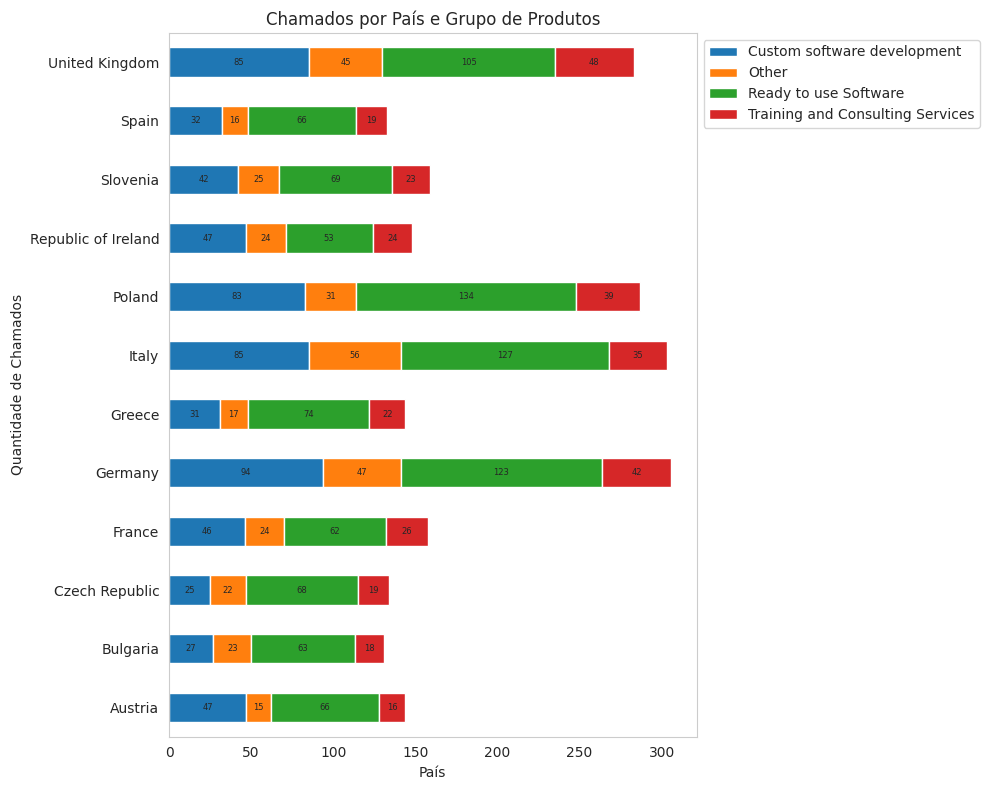

In [ ]:
from collections import OrderedDict


# Chamados agrupados por País e Grupo de Produtos - gráfico de barras empilhadas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


dados = chamados_tec.groupby(by=['Country','Product group']).size().unstack()



# Reset the index to make 'Country' a column again
dados = dados.reset_index()

ax = dados.plot(x='Country',kind='barh', stacked=True,
        title='Chamados por País e Grupo de Produtos',figsize=(10, 8))
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.grid(False)

ax.set_xlabel('País')
ax.set_ylabel('Quantidade de Chamados')
for container in ax.containers: # imprime as quantidades de chamado por status, próximo às barras
    ax.bar_label(container, fontsize=6, label_type='center')

plt.tight_layout()
plt.show()



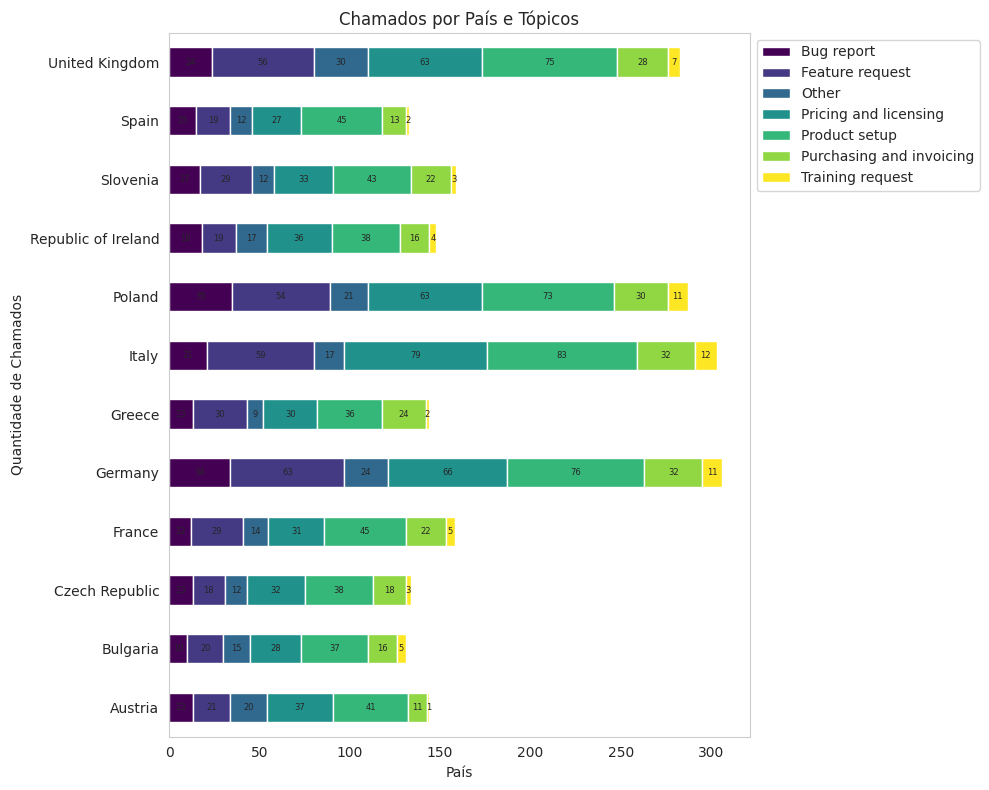

In [ ]:
from collections import OrderedDict


# Chamados agrupados por País e Tópicos - gráfico de barras empilhadas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


dados = chamados_tec.groupby(by=['Country','Topic']).size().unstack()



# Reset the index to make 'Country' a column again
dados = dados.reset_index()

ax = dados.plot(x='Country',kind='barh', stacked=True,
        title='Chamados por País e Tópicos',figsize=(10, 8),colormap='viridis')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.grid(False)

ax.set_xlabel('País')
ax.set_ylabel('Quantidade de Chamados')
for container in ax.containers: # imprime as quantidades de chamado por status, próximo às barras
    ax.bar_label(container, fontsize=6, label_type='center')

plt.tight_layout()
plt.show()


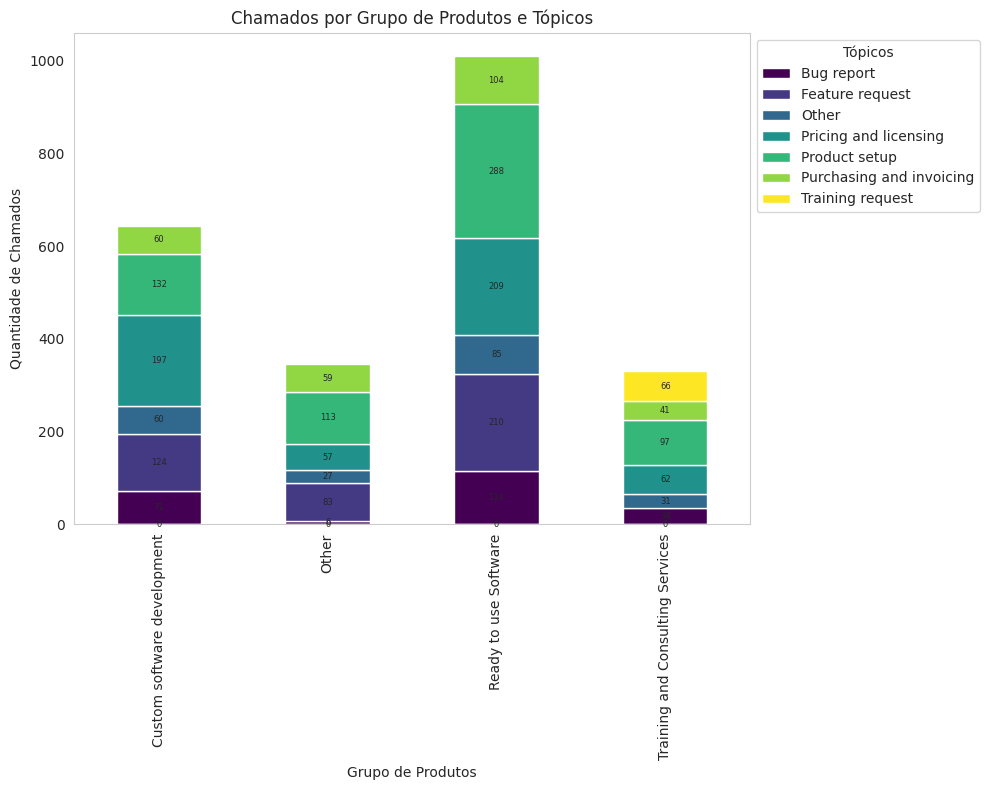

In [ ]:
from collections import OrderedDict


# Chamados agrupados por Grupo de Produtos e Tópicos - gráfico de barras empilhadas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


dados = chamados_tec.groupby(by=['Product group','Topic']).size().unstack()



# Reset the index to make 'Product Group' a column again
dados = dados.reset_index()

ax = dados.plot(x='Product group',kind='bar', stacked=True,
        title='Chamados por Grupo de Produtos e Tópicos',figsize=(10,8),colormap='viridis')
ax.legend(title='Tópicos',loc='upper left', bbox_to_anchor=(1, 1))
ax.grid(False)

ax.set_xlabel('Grupo de Produtos')
ax.set_ylabel('Quantidade de Chamados')
for container in ax.containers: # imprime as quantidades de chamado por status, próximo às barras
    ax.bar_label(container, fontsize=6, label_type='center')

plt.tight_layout()
plt.show()


Columns 'Created time' or 'Resolution time' are not in datetime format.


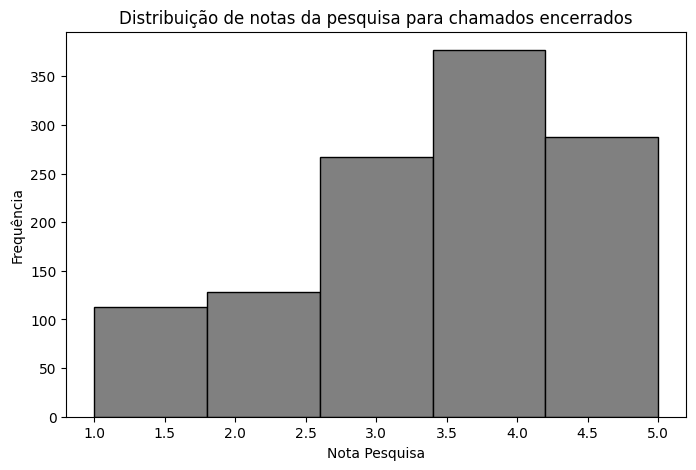

In [68]:


import matplotlib.pyplot as plt

#

# histograma
plt.figure(figsize=(8, 5))
plt.grid(False)

# Filter the DataFrame to include only closed tickets
closed_tickets = chamados_tec[chamados_tec['Status'] == 'Closed']

plt.hist(closed_tickets['Survey results'], bins=5, edgecolor='black', color='grey')
plt.xlabel('Nota da Pesquisa')
plt.ylabel('Frequência')
plt.title('Distribuição de notas da pesquisa para chamados encerrados')




# incluindo título do gráfico e legenda
plt.title('Distribuição de notas da pesquisa para chamados encerrados')
plt.ylabel('Frequência')
plt.xlabel('Nota Pesquisa')
plt.show()






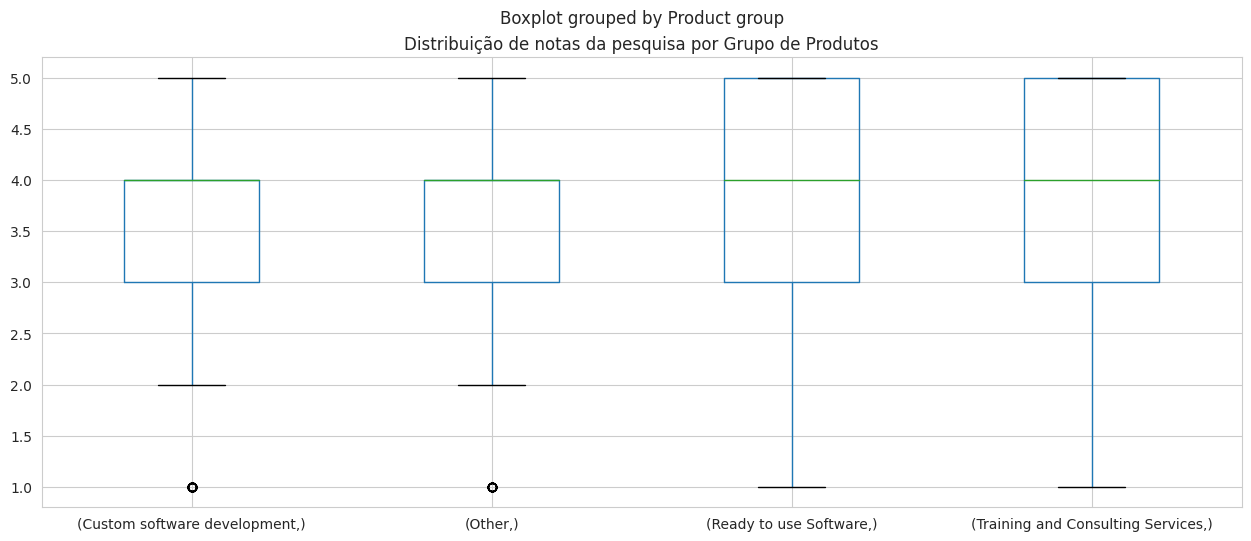

In [ ]:
import matplotlib.pyplot as plt
ax = chamados_tec.boxplot(column=['Survey results'], by=['Product group'], figsize=(15, 6))
ax.set(xlabel='', ylabel='')
plt.title('Distribuição de notas da pesquisa por Grupo de Produtos')
plt.show()

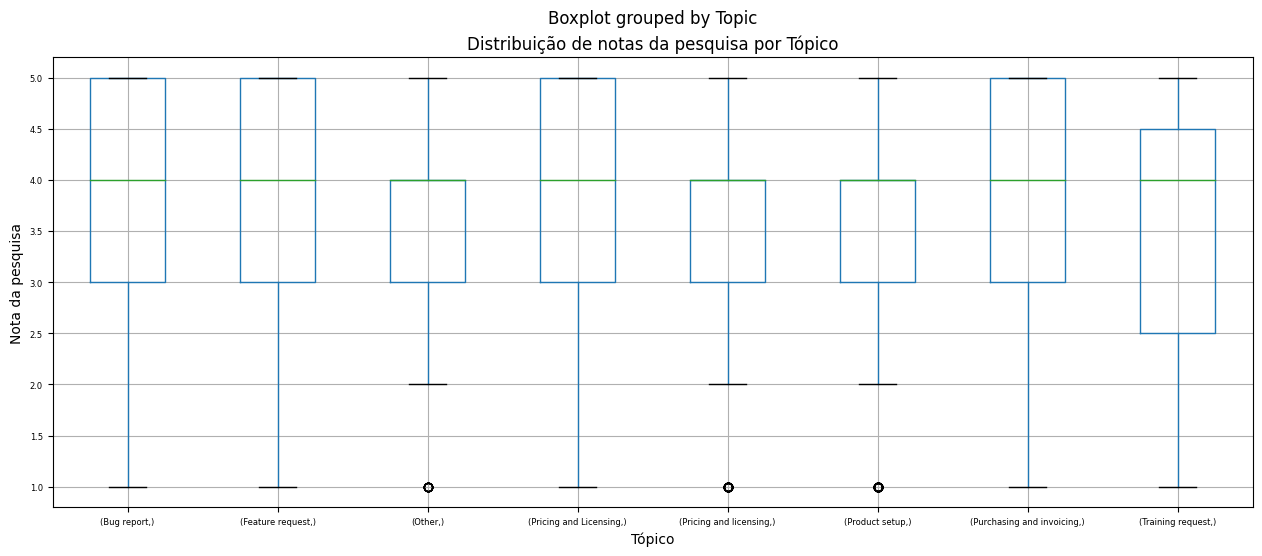

In [64]:
import matplotlib.pyplot as plt
ax = chamados_tec.boxplot(column=['Survey results'], by=['Topic'], figsize=(15, 6),fontsize=6)
ax.set(xlabel='Tópico', ylabel='Nota da pesquisa')
plt.title('Distribuição de notas da pesquisa por Tópico')
plt.show()

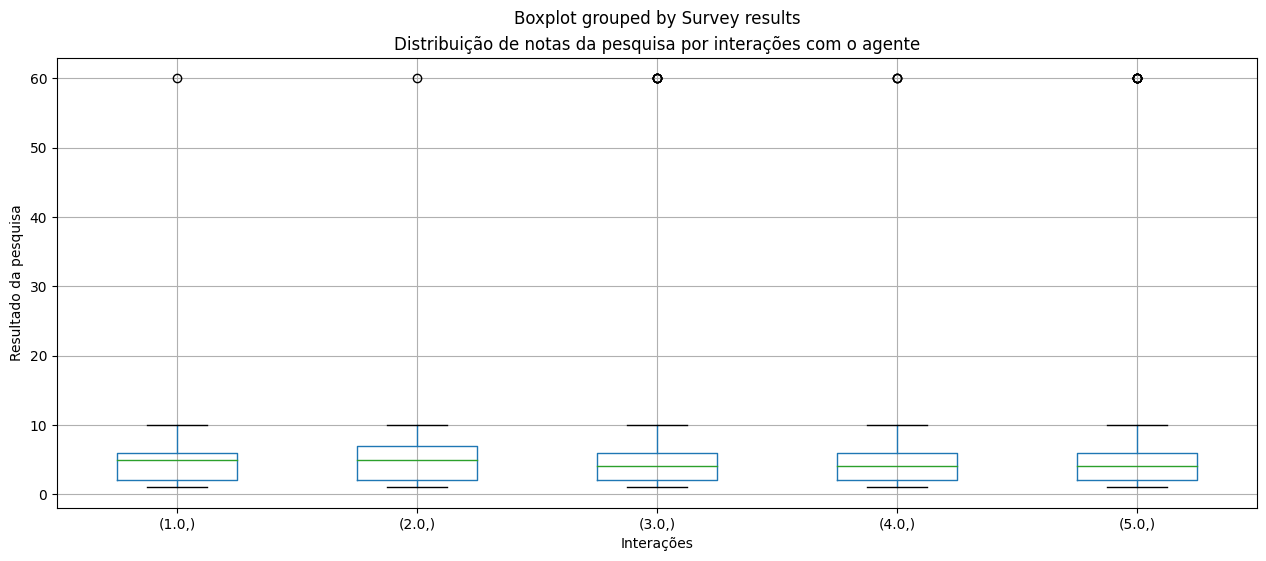

In [63]:
import matplotlib.pyplot as plt
ax = chamados_tec.boxplot(column=['Agent interactions'], by=['Survey results'], figsize=(15, 6))
ax.set(xlabel='Interações', ylabel='Resultado da pesquisa')
plt.title('Distribuição de notas da pesquisa por interações com o agente')
plt.show()

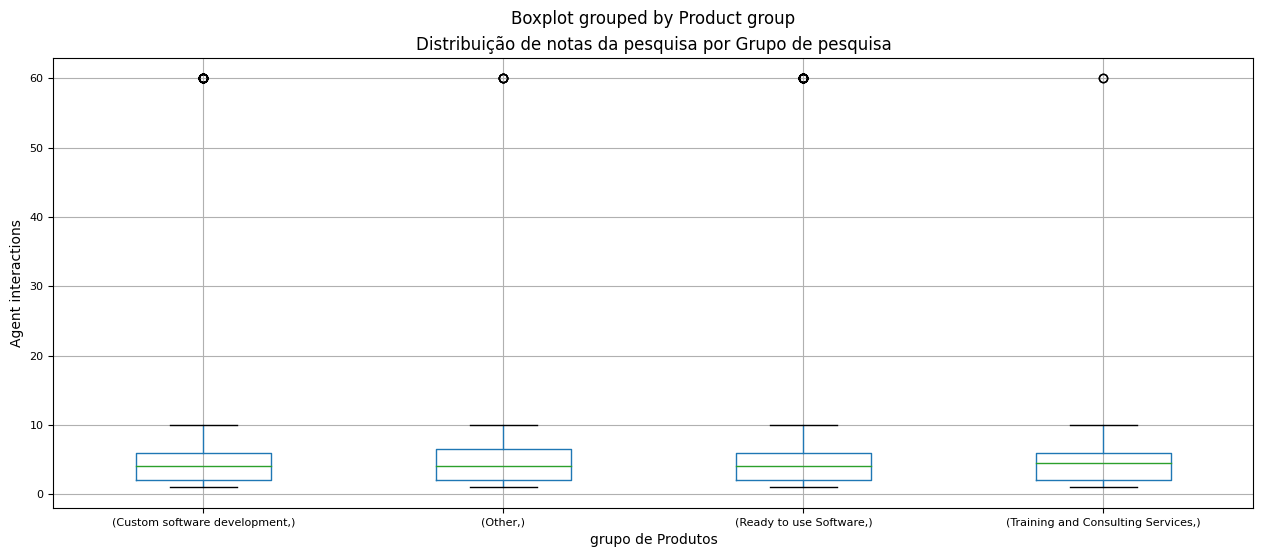

In [67]:
import matplotlib.pyplot as plt
ax = chamados_tec.boxplot(column=['Agent interactions'], by=['Product group'], figsize=(15, 6),fontsize=8)

ax.set(xlabel='grupo de Produtos', ylabel='Agent interactions')
plt.title('Distribuição de notas da pesquisa por Grupo de pesquisa')
plt.show()

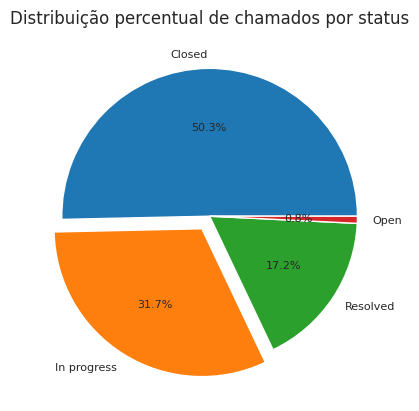

In [ ]:
import matplotlib.pyplot as plt

# Calculate the number of unique values in the 'Status' column
num_status = len(chamados_tec['Status'].value_counts())

# Create an 'explosao' tuple with the same length as num_status
# explosao = (0.1,) * num_status
explosao = (0.0, 0.1, 0.0, 0.0)

plt.pie(chamados_tec['Status'].value_counts(), explode=explosao, labels=chamados_tec['Status'].unique(), autopct='%1.1f%%')
plt.setp(plt.gcf().gca().texts,fontsize=8)

plt.title('Distribuição percentual de chamados por status')
plt.show()


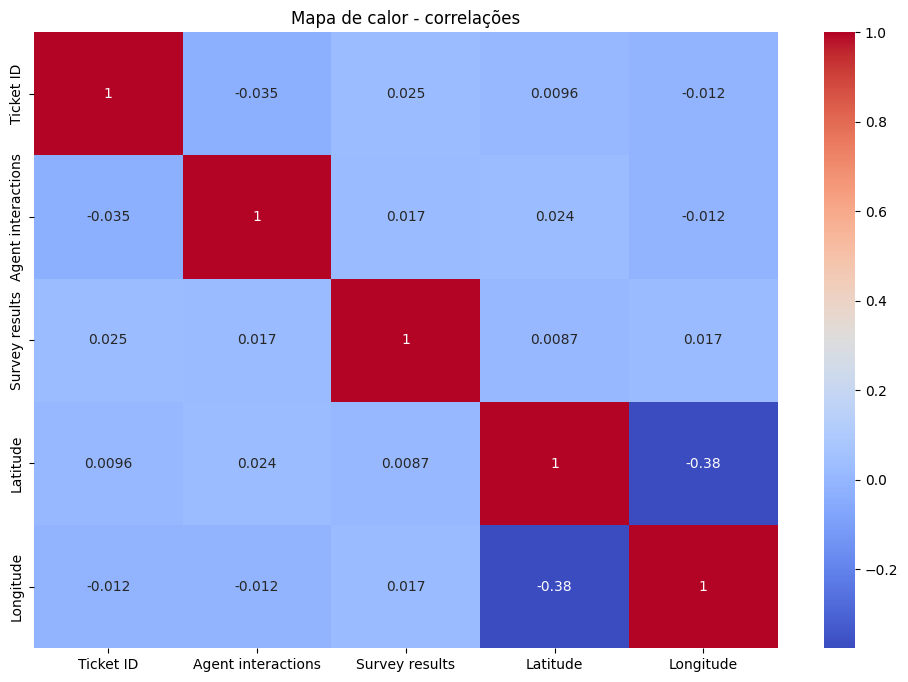

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Select only numeric columns for correlation
campos_numericos_cham_tec = chamados_tec.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(campos_numericos_cham_tec.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor - correlações')
plt.show()

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install pyecharts


from pyecharts import options as opts
from pyecharts.charts import Line, Bar, Scatter
from datetime import datetime, timedelta

# Convert 'Created time' column to datetime
chamados_tec['Created time'] = pd.to_datetime(chamados_tec['Created time'])

chamados_tec['Hour'] = chamados_tec['Created time'].dt.strftime('%H')
hourly_counts = chamados_tec.groupby('Hour').size()
peak_time_chart = Line()
peak_time_chart.add_xaxis(hourly_counts.index.astype(str).tolist())
peak_time_chart.add_yaxis("Hourly Tickets", hourly_counts.tolist())

peak_time_chart.set_global_opts(
    title_opts=opts.TitleOpts(title="Ticket Volume by Hour"),
    xaxis_opts=opts.AxisOpts(name="Hour", type_="category"),
    yaxis_opts=opts.AxisOpts(name="Number of Tickets"),
)

peak_time_chart.render_notebook()
peak_time_chart.render("peak_time_chart.html")

'/content/peak_time_chart.html'